<a href="https://colab.research.google.com/github/DanYT2/machine_learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate linearly separable data
np.random.seed(0)
X = np.concatenate([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]])
y = np.concatenate([np.zeros(20), np.ones(20)])

In [ ]:
# Create the SVM classifier
svm = SVC(kernel='linear')

# Fit the SVM classifier
svm.fit(X, y)

SVC(kernel='linear')

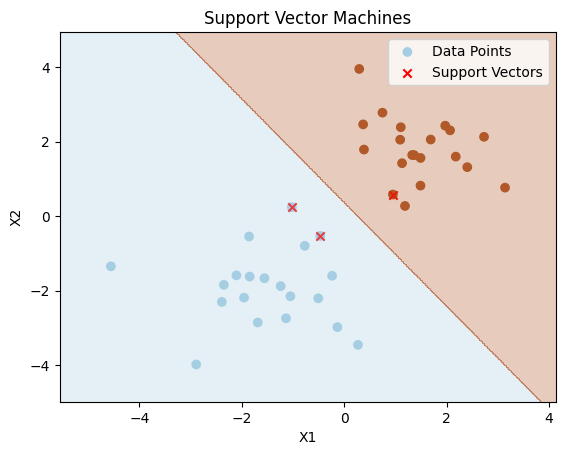

In [ ]:
# Get the support vectors and their corresponding classes
support_vectors = svm.support_vectors_
support_vector_labels = svm.dual_coef_.ravel() > 0

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for the meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data Points')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Set labels and titles
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Support Vector Machines')
plt.legend()

# Show the plot
plt.show()

### Kernel Functions

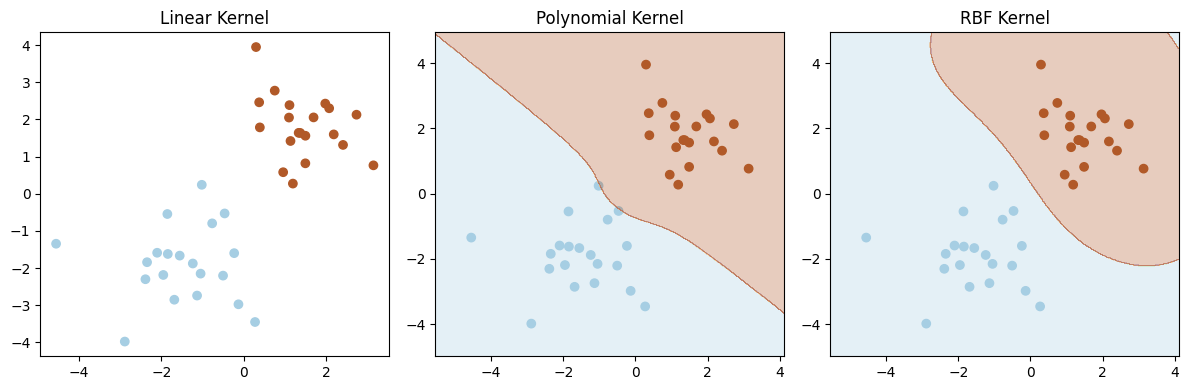

In [ ]:
# Create the SVM classifiers with different kernels
svm_poly = SVC(kernel='poly', degree=3)  # Polynomial kernel
svm_rbf = SVC(kernel='rbf')  # RBF kernel
svm_sigmoid = SVC(kernel='sigmoid')  # Sigmoid kernel

# Fit the SVM classifiers
svm_poly.fit(X, y)
svm_rbf.fit(X, y)
svm_sigmoid.fit(X, y)

# Set up the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for the meshgrid points
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

Z_sigmoid = svm_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sigmoid = Z_sigmoid.reshape(xx.shape)

# Plot the data points
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear Kernel')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z_poly, alpha=0.3, cmap=plt.cm.Paired)
plt.title('Polynomial Kernel')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z_rbf, alpha=0.3, cmap=plt.cm.Paired)
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()
